# Exploring Pokemon Information Using Python

![image-3.png](https://images.freecreatives.com/wp-content/uploads/2016/03/Free-HD-Pokemon-Wallpapers.jpg)

## Step 1: Import Packages 📦


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Import the Data ⬇️
 For this project, I will be using the Pokemon Dataset that I took from Kaggle: 
(https://www.kaggle.com/datasets/abcsds/pokemon)

In [2]:
# Import the CSV file
pokemon_dataset = pd.read_csv("Pokemon.csv")

pokemon_dataset.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
# Using .shape will return the number of rows and columns for the Pokemon Dataset. 
pokemon_dataset.shape

(800, 13)

There are `800 rows and 13 columns` in the dataset

In [4]:
# Using .columns will return the name of columns in this Pokemon Dataset.
pokemon_dataset.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

For this dataset, there are only 13 columns and I can see everything in one glance. Real-life data will definitely contain much more data and many more columns. Hence using `.columns` will be useful for these kind of situations.

## Step 3: Data Cleaning 🧽

For this portion, I will be checking for:
1. Duplicated columns (we don't need duplicated data for a single pokemon)
2. NULL Values in the dataset
3. Filling NULL values (filling NULL type 2 attributes with respective type 1 attributes)
4. Dropping uneccessary columns

### Checking For Duplicated Columns:

In [5]:
# Using `.duplicated` will return either True (Duplicated Value) or False (Non-duplicated Value)
# This will allow me to know which row is duplicated when I reference back to the dataset.
pokemon_dataset.Name.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Name, Length: 800, dtype: bool

In [6]:
# adding a `.sum()` beheind `.duplicated()` will return the count of duplicated rows
pokemon_dataset.Name.duplicated().sum()

0

This dataset is `quite clean and perfect` as there are no duplicated data in the dataset.

In [7]:
# To double confirmed if there are no duplicated values, I will use `.nunique()` to check the unique values
pokemon_dataset.Name.nunique()

800

There are 800 rows (calculated from above) and 800 unique values. This shows that there are no duplicated values and every row is unique.

### Checking For NULL Columns:

In [8]:
# Using .isna() will return either True (Null values) or False (Filled values)
# The focus us on the "Name" column
pokemon_dataset.isna()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,False,False,False,False,False,False,False,False,False,False,False,False,False
796,False,False,False,False,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,False,False,False
798,False,False,False,False,False,False,False,False,False,False,False,False,False


I couldn't help but notice that there's a value of "TRUE" in the "Type 2" column. I'll investigate the data further to gather more information.

In [9]:
# adding a .sum() beheind .isna() will return the count of duplicated rows
pokemon_dataset.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

There are 386 null values in the "Type 2" column, indicating Pokémon that lack a "Type 2" attribute or ability. To address this, I'll replace these null values with their corresponding "Type 1" attribute.

### Substituiting Missing Values:

In [10]:
# Filling up Type 2 null values with their respective Type 1 attributes
pokemon_dataset["Type 2"].fillna(pokemon_dataset["Type 1"], inplace = True)


In [11]:
pokemon_dataset.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False


With this, the "Type 2" NULL values have been filled up with their respective "Type 1" attributes. (take a look at row 4 - Charmander before and after this line of code)

### Dropping Uneccessary Columns:

The "#" column is making me very confused and all I can think about right now is to remove it. So, lets do it!

In [12]:
pokemon_dataset.drop("#", axis = 1).head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


## Step 4: Explore the Data 🤔
I love to explore my data visually, so let us take a look at it together!

### Question 1:  How many Pokemons are there in each Type attribute? (based on Type 1)

In [13]:
# Used `.grouby()` and `.size` to return the values that I want.
# Added `.sort_values()` to sort the results from asc to desc order.
pokemons_in_each_type = pokemon_dataset.groupby("Type 1").size().reset_index(name = "Type_Count").sort_values(by = "Type_Count")

pokemons_in_each_type

,Type 1,Type_Count
7,Flying,4
4,Fairy,17
11,Ice,24
5,Fighting,27
16,Steel,27
13,Poison,28
1,Dark,31
8,Ghost,32
2,Dragon,32
10,Ground,32


In [14]:
# Observed that the column name is 0. Let me change it by using `.rename`
pokemons_in_each_type.rename(columns={0:'Count'}, inplace=True)

pokemons_in_each_type

,Type 1,Type_Count
7,Flying,4
4,Fairy,17
11,Ice,24
5,Fighting,27
16,Steel,27
13,Poison,28
1,Dark,31
8,Ghost,32
2,Dragon,32
10,Ground,32


#### Plotting and doing some visualization:

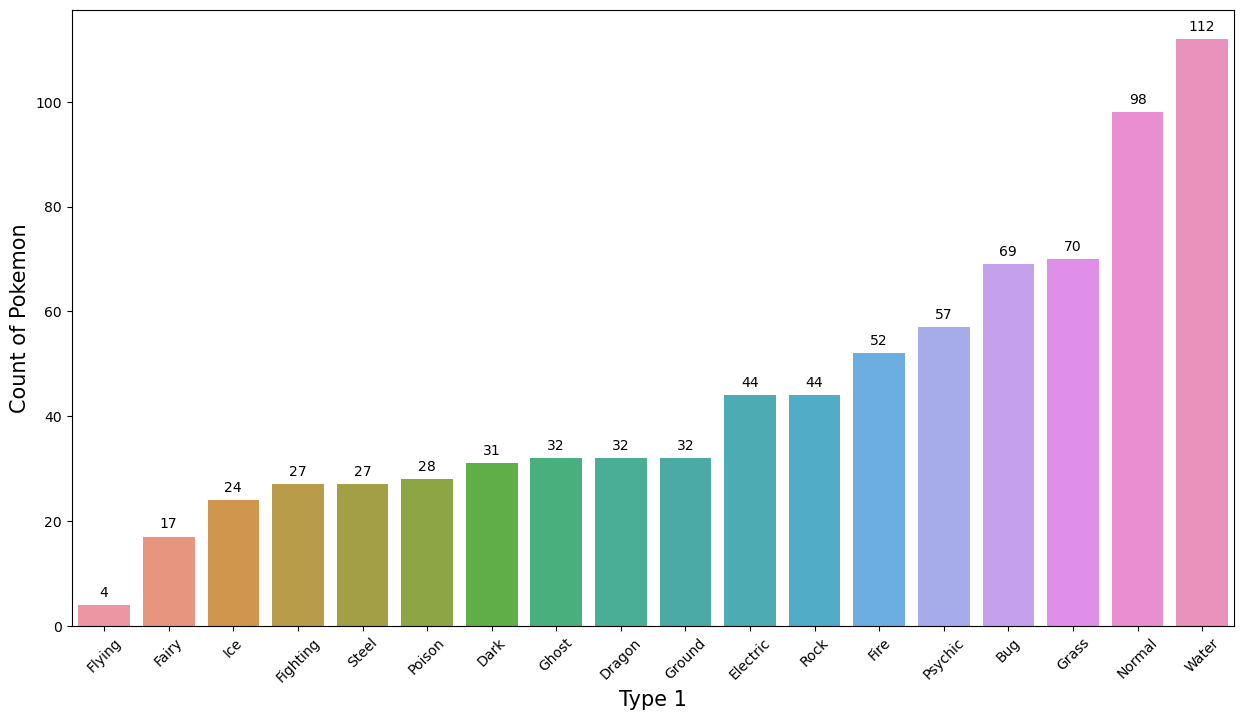

In [15]:
# Plotting the size of the entire plot
plt.figure(figsize=(15,8))

# This portion is included so that I can annotate the graphs (took it from the internet #resourceful)
splot = sns.barplot(x = "Type 1", y = "Type_Count" , data=pokemons_in_each_type)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), #'.0f' represents 0 decimals
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
# Label Title

# Label y-axis
plt.ylabel("Count of Pokemon", fontsize = 15)

# Label x-axis
plt.xlabel("Type 1", fontsize = 15)

# Make the x-axis values rotate to 45 degrees so that it looks nicer
plt.xticks(rotation = 45)
plt.ticklabel_format(style='plain', axis='y')

Based on the information gathered, we can take a look at the number of pokemons that belongs to Type 1 attriute across 6 generations.

**Top 3 Type Count:**
1. Water (112)
2. Normal (98)
3. Grass (70)

**Bottom 3 Type Count:**
1. Flying (4)
2. Fairy (17)
3. Ice (24)

### Question 2: How many Pokemons are there in each generation?
- We know that there are a total of 800 pokemons across 6 generations. 
- How many are there in each generation?

In [16]:
pokemons_in_each_generation = pokemon_dataset.groupby("Generation").size().reset_index(name = "Generation_Count").sort_values(by = "Generation_Count")

pokemons_in_each_generation

,Generation,Generation_Count
5,6,82
1,2,106
3,4,121
2,3,160
4,5,165
0,1,166



#### Plotting and doing some visualizations:

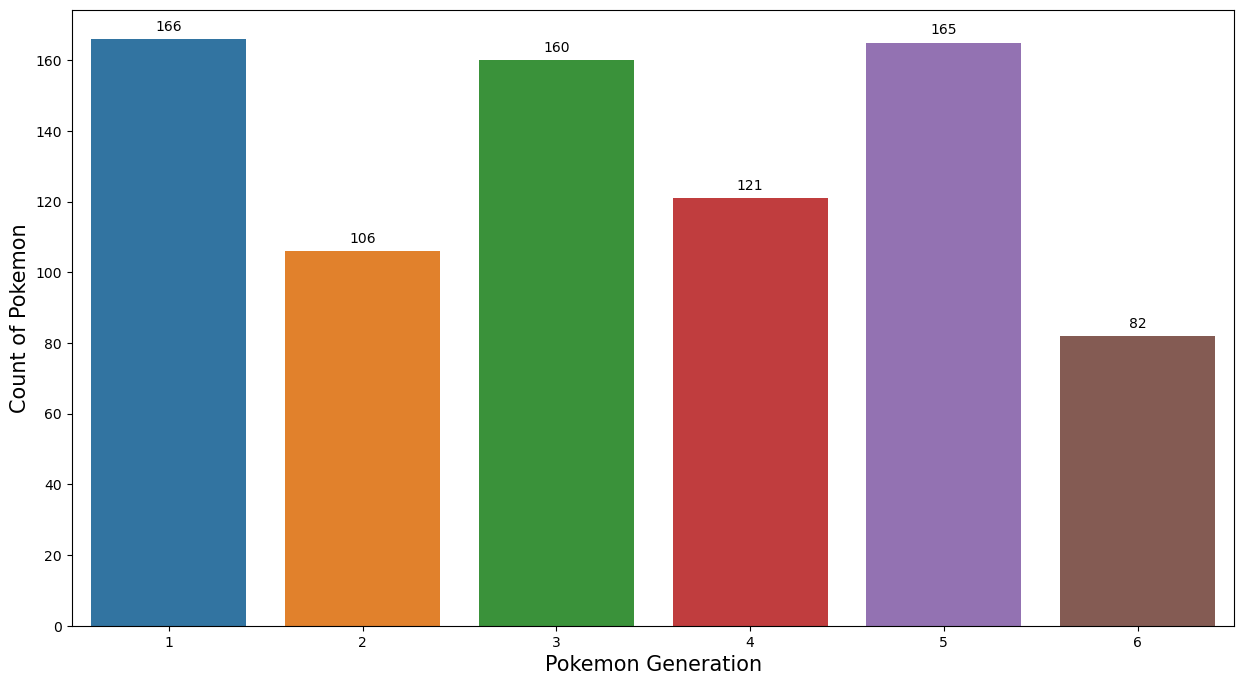

In [17]:
# Plotting the size of the entire plot
plt.figure(figsize=(15,8))

# This portion is included so that I can annotate the graphs (took it from the internet #resourceful)
splot = sns.barplot(x = "Generation", y = "Generation_Count" , data=pokemons_in_each_generation)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), #'.0f' represents 0 decimals
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), 
                   textcoords = 'offset points')
# Label Title

# Label y-axis
plt.ylabel("Count of Pokemon", fontsize = 15)

# Label x-axis
plt.xlabel("Pokemon Generation", fontsize = 15)

# Make the x-axis values rotate to 45 degrees so that it looks nicer
plt.ticklabel_format(style='plain', axis='y')

Based on the information gathered, we can see that:

1. Generation 1 has the most number of Pokemons (166), followed by Generation 5 (165) and Generation 4 (160)
2. For some reason, I observed that the "odd-year" generations have more pokemon while the "even-year" pokemon generations have much few pokemons.

### Question 3: Which type of pokemon is the strongest for each category? (HP, Attack, Defense, Speed Attack, Speed Defense, Speed)

For this question, I will be doing an analysis for each of the types.

### 1) HP (Health Points)

<Axes: title={'center': 'HP (Health Points) by Type 1'}, xlabel='Type 1', ylabel='HP'>

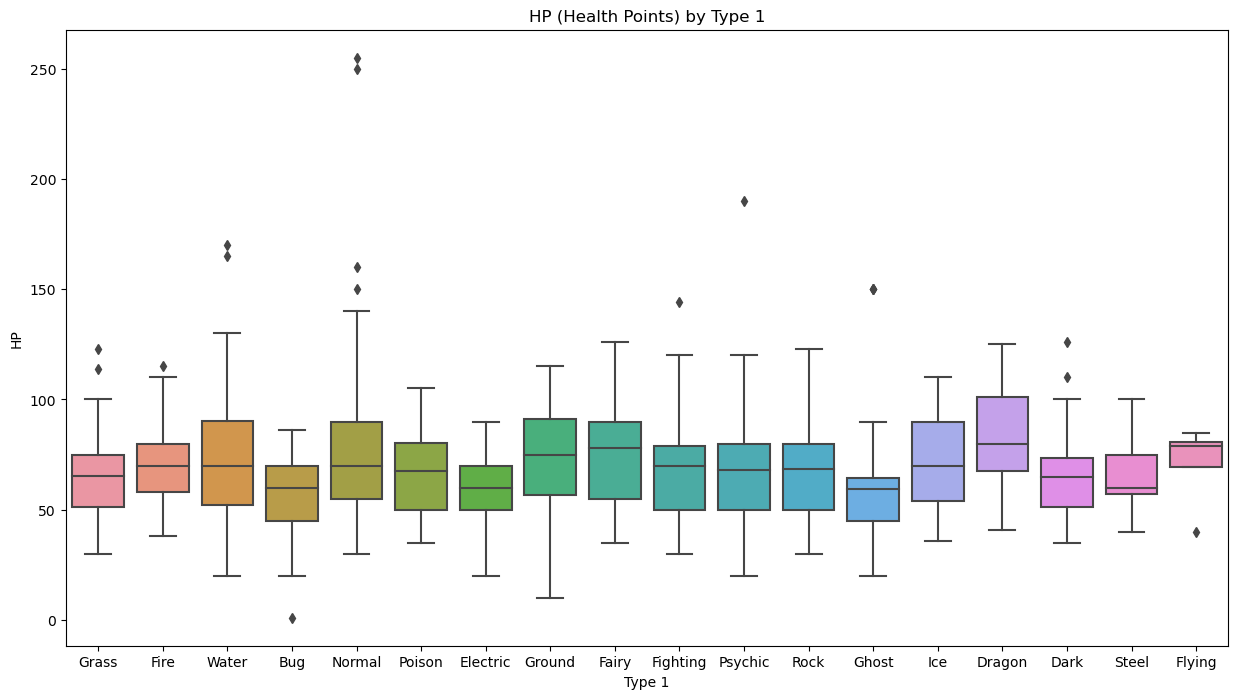

In [18]:
plt.figure(figsize=(15,8))

plt.title('HP (Health Points) by Type 1')

sns.boxplot(x = "Type 1", y = "HP", data = pokemon_dataset)

Based on the Boxplot above, we can observe that: (by looking at the Median Value)
- Dragon and Fairy type pokemon has higher HP as compared to the other Pokemon Types.

### 2) Attack Points

<Axes: title={'center': 'Attack by Type 1'}, xlabel='Type 1', ylabel='Attack'>

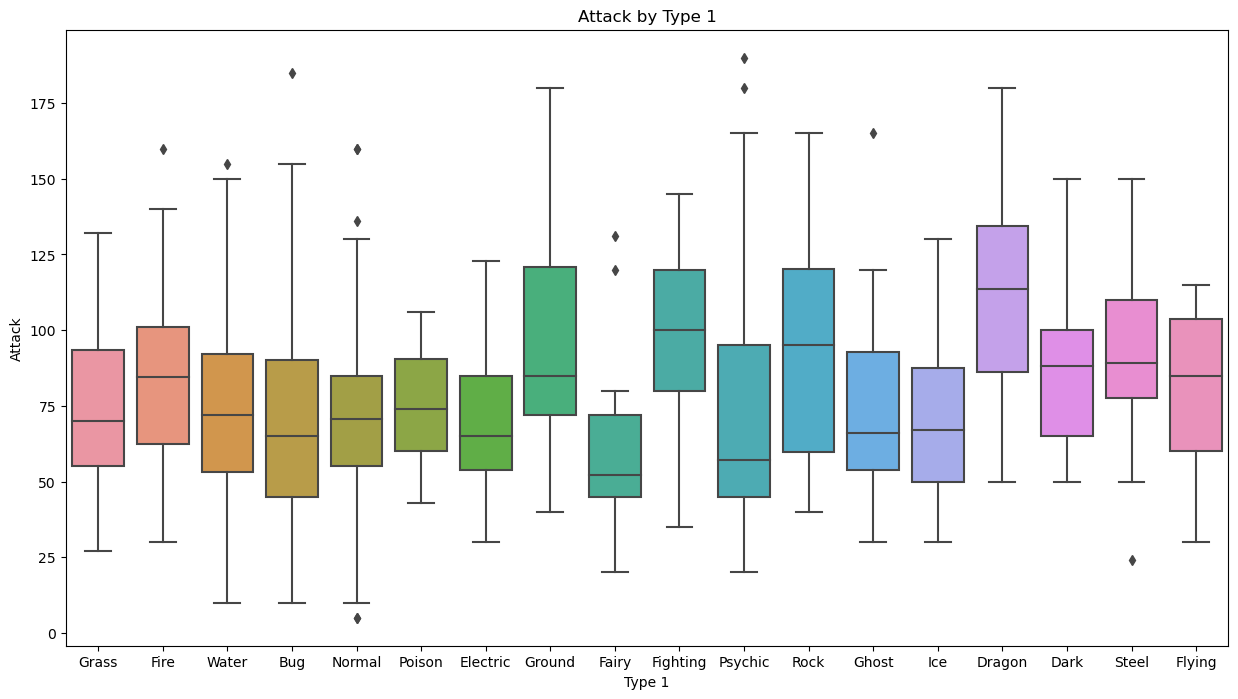

In [19]:
plt.figure(figsize=(15,8))

plt.title('Attack by Type 1')

sns.boxplot(x = "Type 1", y = "Attack", data = pokemon_dataset)

Based on the Boxplot above, we can observe that: (by looking at the Median Value)
- Dragon Type Pokemons has the high attack value, followed by Fighting type and Rock Type

### 3. Defense Points

<Axes: title={'center': 'Defense by Type 1'}, xlabel='Type 1', ylabel='Defense'>

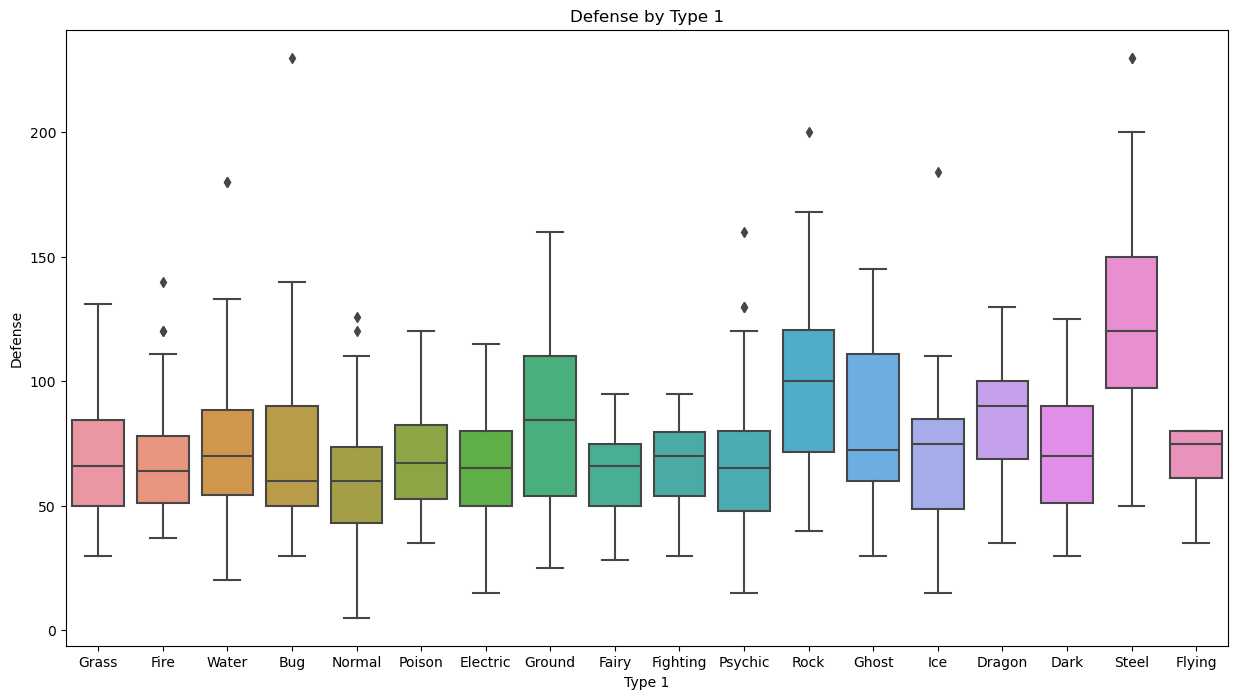

In [20]:
plt.figure(figsize=(15,8))

plt.title('Defense by Type 1')

sns.boxplot(x = "Type 1", y = "Defense", data = pokemon_dataset)

Based on the Boxplot above, we can observe that: (by looking at the Median Value)
- Steel Type Pokemon has a significally higher defense as compared to the other pokemon type, followed by Rock Type and Dragon Type

### 4) Speed Attack Points
- Speed is the Base Stat that determines the place a Pokemon will strike in Battle. Since Pokemon Battles are turn based, Speed determines if your Pokemon will attack first or last.

<Axes: title={'center': 'Speed Attack by Type 1'}, xlabel='Type 1', ylabel='Sp. Atk'>

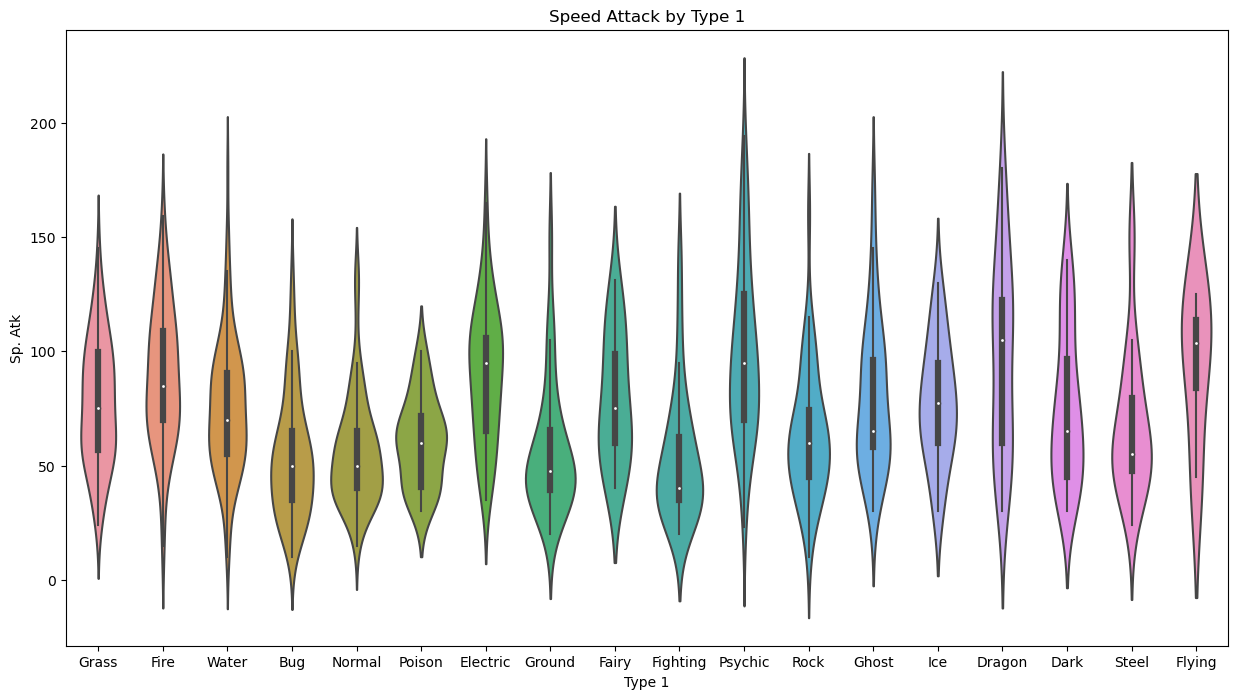

In [21]:
plt.figure(figsize=(15,8))

plt.title('Speed Attack by Type 1')

sns.violinplot(x = "Type 1", y = "Sp. Atk", data = pokemon_dataset)

Based on the Boxplot above, we can observe that: (by looking at the Median Value)
- Dragon, Flying, Psychic and Electric Type Pokemons have higher speed attack values as compared to the other the other Pokemon Types.

### 5) Speed Defence Points
- Special Defense is the Base Stat that determines how much damage a Pokemon can resist from Special Attacks. Speed is the Base Stat that determines the place a Pokemon will strike in Battle

<Axes: title={'center': 'Speed Defense by Type 1'}, xlabel='Type 1', ylabel='Sp. Def'>

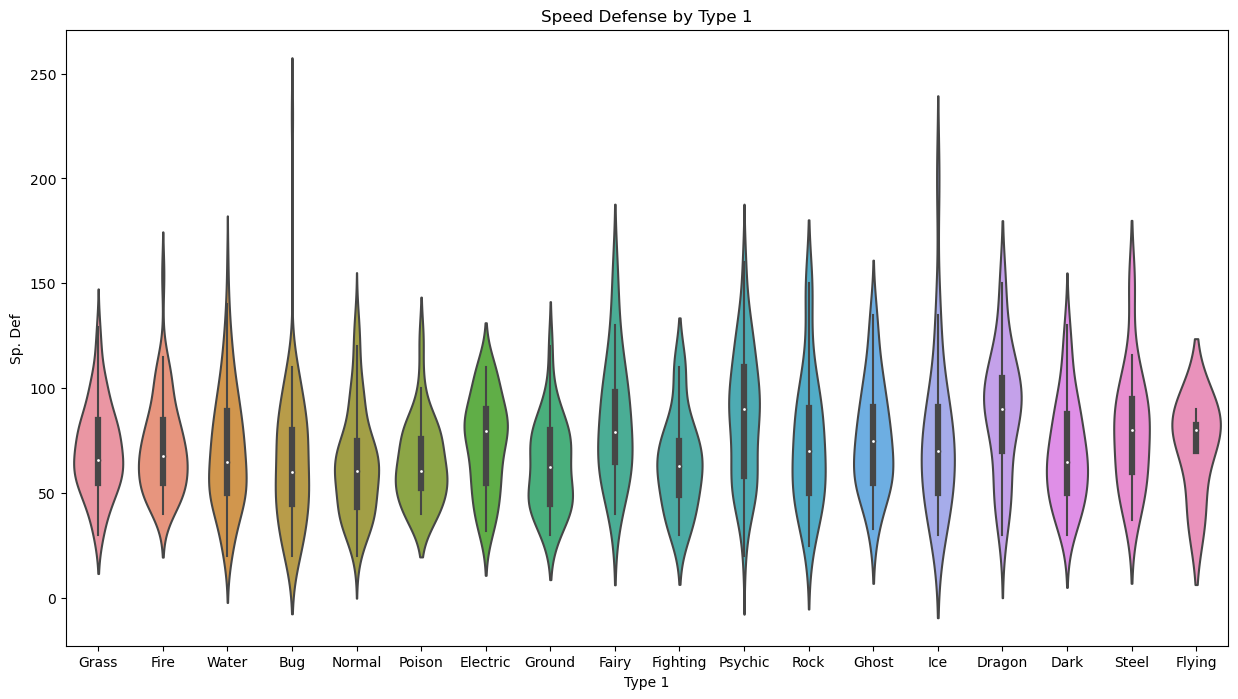

In [22]:
plt.figure(figsize=(15,8))

plt.title('Speed Defense by Type 1')

sns.violinplot(x = "Type 1", y = "Sp. Def", data = pokemon_dataset)

Based on the Boxplot above, we can observe that: (by looking at the Median Value)
- Psychic and Dragon Type Pokemons have higher speed defense values as compared to the other the other Pokemon Types.

### 6) Speed Points
- Speed is the Base Stat that determines the place a Pokemon will strike in Battle. Since Pokemon Battles are turn based, Speed determines if your Pokemon will attack first or last.

<Axes: title={'center': 'Speed by Type 1'}, xlabel='Type 1', ylabel='Speed'>

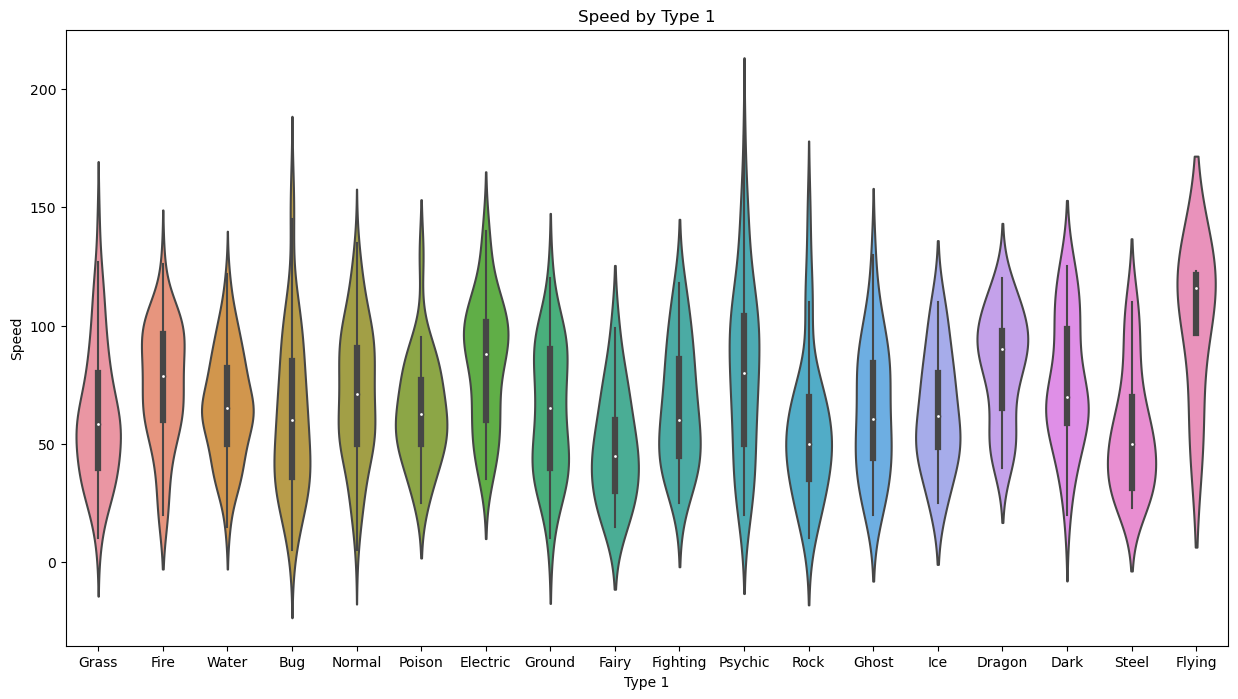

In [23]:
plt.figure(figsize=(15,8))

plt.title('Speed by Type 1')

sns.violinplot(x = "Type 1", y = "Speed", data = pokemon_dataset)

Based on the Boxplot above, we can observe that: (by looking at the Median Value)
- Flying Type Pokemons have higher Speed as compared to the other the other Pokemon Types.

### Question 4: How many Normal and Legendary Pokemons are there?

Under the "Legendary" Column,

- False = Normal Pokemon

- True = Legendary Pokemon

In [24]:
pokemon_dataset.groupby("Legendary").size().reset_index(name = "Legendary_Count").sort_values(by = "Legendary_Count")

,Legendary,Legendary_Count
1,True,65
0,False,735


There are a total of `735 Normal Pokemon` and `65 Legendary Pokemon`.

### Question 5: How do Legendary Pokémon compare in terms of power?

<Axes: xlabel='Type 1', ylabel='Total'>

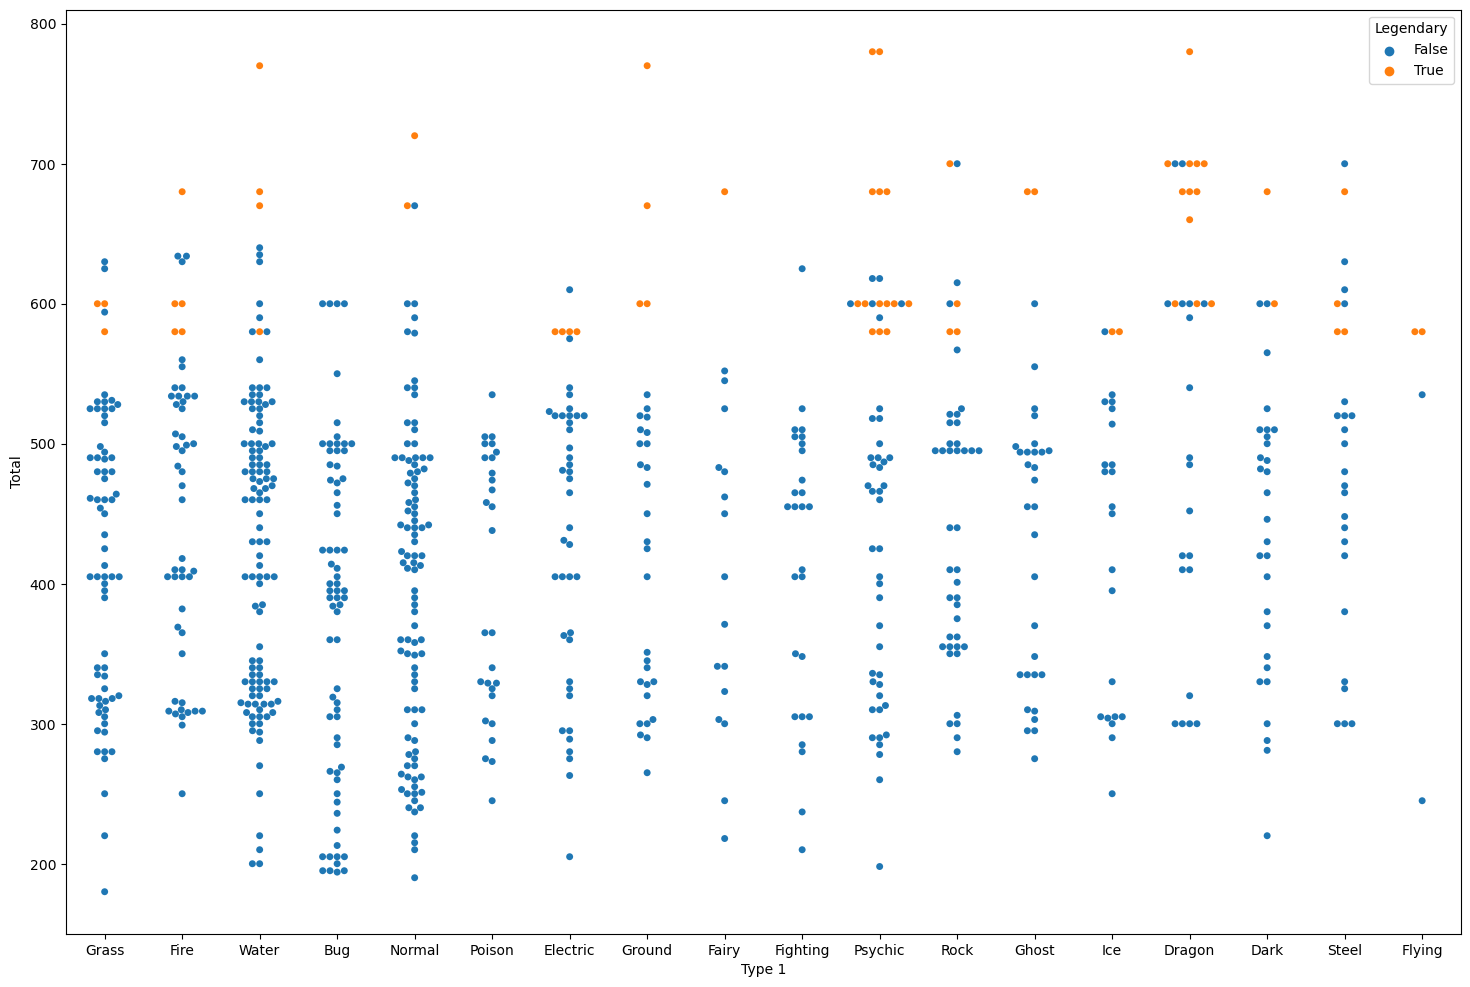

In [25]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='Type 1',y='Total',data=pokemon_dataset,hue='Legendary')

Based on the swarmplot, we can observe that Legendary Pokemons are mostly taking the top spots in the Strongest Pokemons.

### Question 5: Which generation, on average, demonstrates the greatest strength?

In [28]:
strongest = pokemon_dataset.groupby("Generation")["Total"].mean().reset_index(name = "Power").sort_values(by = "Power", ascending=False)

strongest

,Generation,Power
3,4,459.016529
5,6,436.378049
2,3,436.225000
4,5,434.987879
0,1,426.813253
1,2,418.283019


Text(0.5, 1.0, 'Average Power Per Generation')

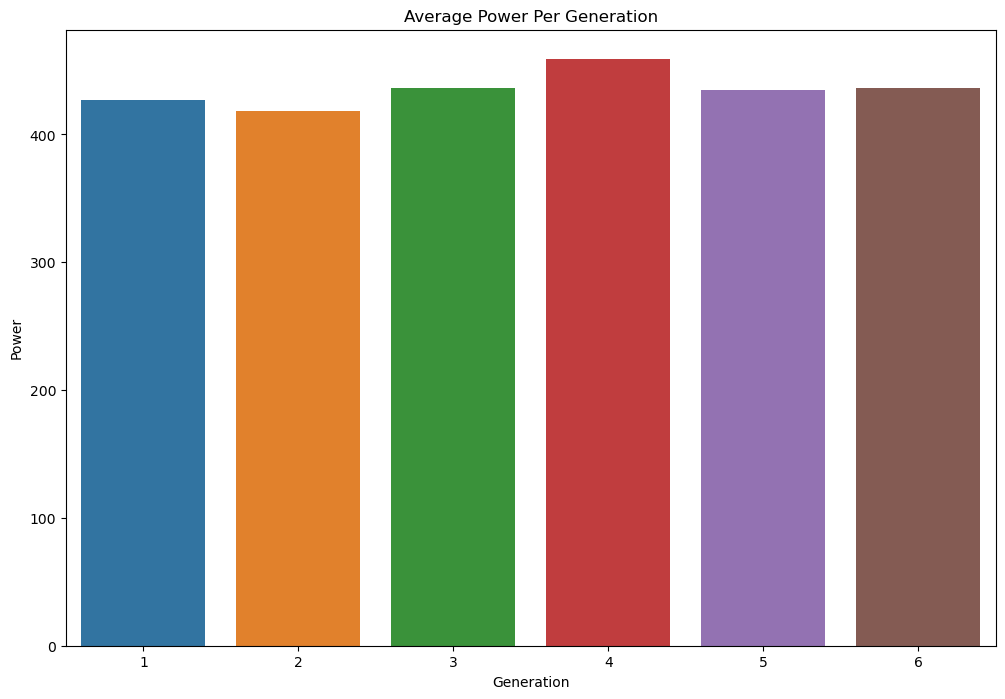

In [34]:
plt.figure(figsize=(12,8))

sns.barplot(data=strongest, x = "Generation", y = "Power")
plt.title("Average Power Per Generation")

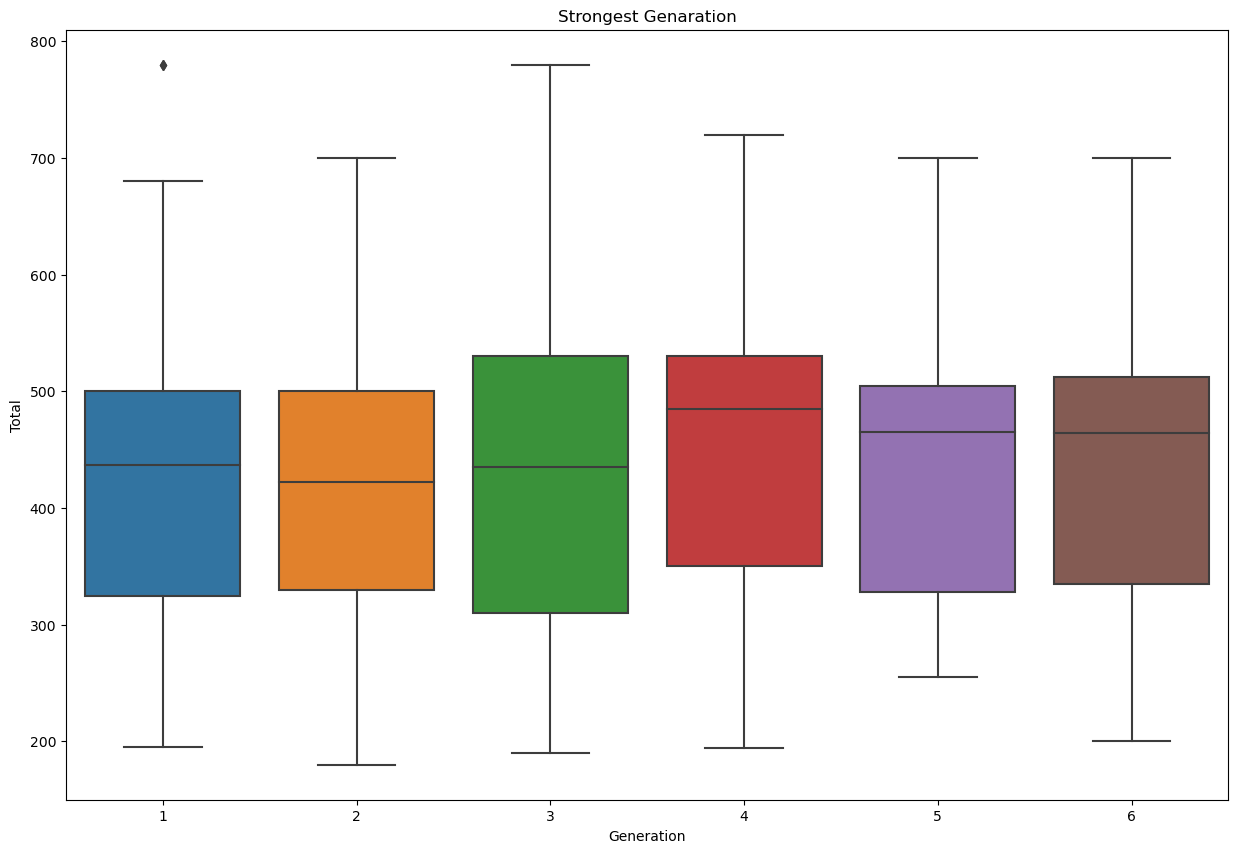

In [29]:
plt.subplots(figsize = (15,10))

plt.title('Strongest Genaration')

sns.boxplot(x = "Generation", y = "Total",data = pokemon_dataset)

plt.show()


On avergae, the boxplot indicates that `Pokémon from Generation 4 are superior`.

### Thank you for taking time to view my project! 😊